In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
sn.get_dataset_names()

C:\Users\bhn\Anaconda3\lib\site-packages\seaborn\utils.py:384: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 384 of the file C:\Users\bhn\Anaconda3\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [4]:
df = sn.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Use tips file from the available datasets, work only on the feature total_bill

- Visualize boxplot and histogram to comment on the distribution
- Comment on skewness and kurtosis
- Use both outlier detection methods (IQR Method & Z Method)
- Provide your analysis about the outliers obtained
- Did you observe any difference in the two methods of outliers?
- Find correlation of total_bill and size, comment on the correlation (bivariate analysis)

## Share your responses in the same file as comments (so that it is understandable)

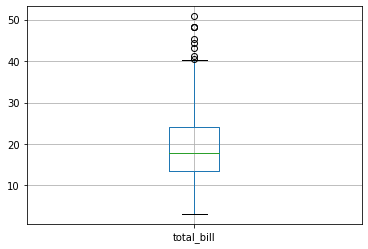

In [5]:
df.boxplot(column=['total_bill'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BF88FEE048>]],
      dtype=object)

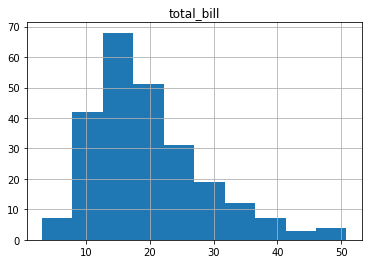

In [7]:
df.hist(column=['total_bill'])
#count of total bill b/w 15 to 25 is high,whreas >40 is low

In [32]:
df[df.total_bill>40].count()
#df.describe()

total_bill    10
tip           10
sex           10
smoker        10
day           10
time          10
size          10
dtype: int64

In [ ]:
Skewness-
=> The graph is skewed to right , as very less people have total bill >=40.

Kurtosis-
=>since the model can only learn the scenario of total_bill approximately between 10 to 30 , that is the lesser values of total bill 
 it is leptokurtic curve.

flier [array([48.27, 44.3 , 41.19, 48.17, 50.81, 45.35, 40.55, 43.11, 48.33])]
whisker [array([13.3475,  3.07  ]), array([24.1275, 40.17  ])]
median [array([17.795, 17.795])]
10.780000000000001
40.2975


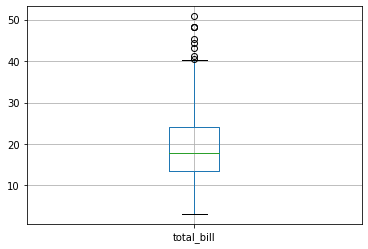

In [26]:
#IQR Method
_,bp=df.boxplot(column=['total_bill'],return_type='both')
flier=[flier.get_ydata() for flier in bp["fliers"]]
whisker=[whiskers.get_ydata() for whiskers in bp["whiskers"]]
median=[median.get_ydata() for median in bp["medians"]]
IQR = 24.1275 - 13.3475
Max_limit = 24.1275 + (1.5*10.78)
print("flier", flier)
print("whisker", whisker)
print("median", median)
print(IQR)
print(Max_limit)

In [13]:
#https://www.geeksforgeeks.org/z-score-for-outlier-detection-python/#:~:text=Z%20score%20is%20also%20called,deviation {Calculating z-score to determine the outliers}
#Z-Method
arr=np.array(df.total_bill)
mean=np.mean(arr)
std=np.std(arr)
threshold=3
outlier=[]
for i in arr:
    z=(i-mean)/std
    if z > threshold:
        outlier.append(i)
print(outlier)

[48.27, 48.17, 50.81, 48.33]


In [ ]:
"""Outlier Analysis"""
From box-plot we can clearly observe that all the total_bill values greater than 40 are considered as outliers,
as there are only 10 rows out of 244 that have these extreme values which is > 40.2975(Q3+(1.5*IQR))  .
However , z-score method gives us only 4 values  [48.27, 48.17, 50.81, 48.33] 
as only these have  > 3 Standard Deviations away from mean and thereby considered as outliers.

In [27]:
#Pearson Correlation
df.corr(method='pearson')

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [28]:
#Spearman Correlation
df.corr(method='spearman')

,total_bill,tip,size
total_bill,1.000000,0.678968,0.604791
tip,0.678968,1.000000,0.468268
size,0.604791,0.468268,1.000000


In [29]:
corr=df.corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm')

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [30]:
corr=df.corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm')

,total_bill,tip,size
total_bill,1.000000,0.678968,0.604791
tip,0.678968,1.000000,0.468268
size,0.604791,0.468268,1.000000


In [ ]:
#Bivariate Analysis
We can see that the pearson correlation between total_bill and size is 0.598315 , 
spearman correlation between total_bill and size is 0.604791.
This signifies "weak correlation" relationship between the 2 variables.
Also implies that the variable "size" is more non-linear and thereby can be dropped.